In [1]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import nltk
from wordcloud import wordcloud
print(sys.executable)
%matplotlib inline

C:\Users\desai\anaconda3\python.exe


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.shape

(31962, 3)

In [5]:
train.head()

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

In [6]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

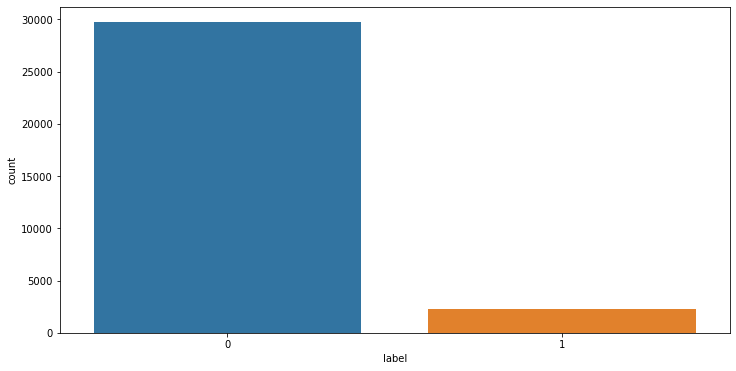

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(x='label',data=train)

In [8]:
import nltk
from nltk.stem import WordNetLemmatizer 
lemma = WordNetLemmatizer()
from nltk.corpus import stopwords

In [9]:
def transform_text(text):
    text = text.lower()
    
    r = re.findall('@[\w]*', text)
    
    for w in r:
        text = text.replace(w, ' ')
    text = text.replace('[^a-zA-Z#]', '')
    text = ' '.join([word for word in text.split() if len(word) > 3])
    
    text = re.sub(r'\$%,.\:\?', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    
    words = text.split(" ")
    words = [lemma.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    text = ' '.join(words) 
    
    return text

In [10]:
train['clean_text'] = train['tweet'].apply(lambda x : transform_text(x))

In [11]:
train.sample(5)

id  label                                              tweet  \
4768    4769      0  please make use of your education. do not let ...   
19395  19396      0                  1 week to go! âºï¸ð @user      
409      410      0  use the power of your mind to #heal your body!...   
18456  18457      0  soror sylvia dunnavant is getting married! #lo...   
10614  10615      0  angry owls #owls #aworks #abstracta #colorful ...   

                                              clean_text  
4768   please make education. waste. learn read compr...  
19395                                    week âºï¸ð  
409       power mind #heal body! #altwaystoheal #healthy  
18456      soror sylvia dunnavant getting married! #love  
10614  angry owl #owls #aworks #abstracta #colorful #...

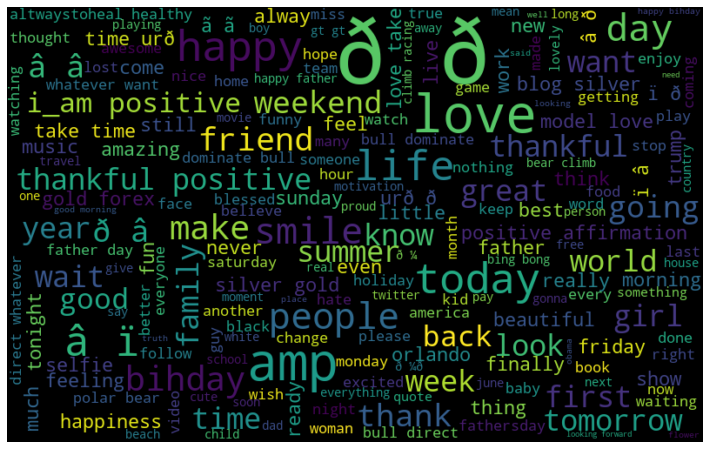

In [12]:
all_words = " ".join(sent for sent in train['clean_text'])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

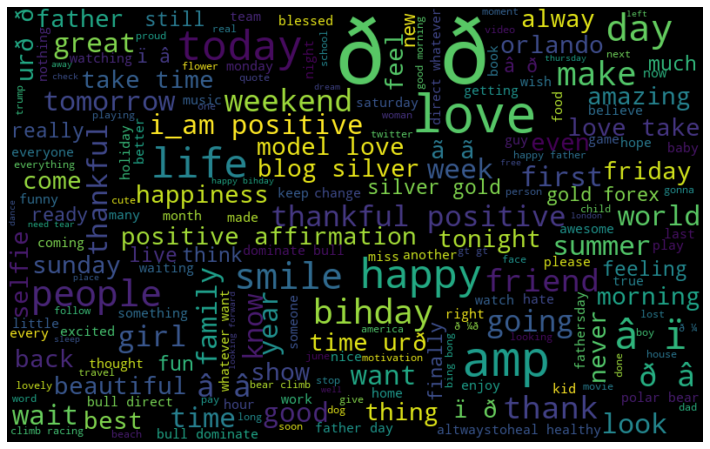

In [13]:
pos_words = " ".join(sent for sent in train['clean_text'][train['label'] == 0])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(pos_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

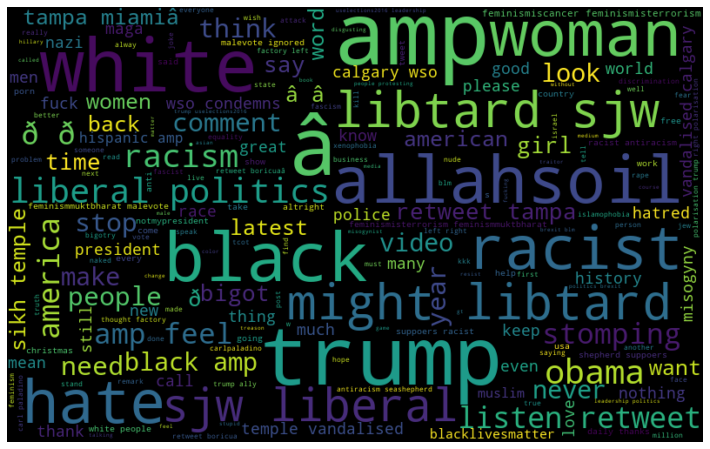

In [14]:
neg_words = " ".join(sent for sent in train['clean_text'][train['label'] == 1])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(neg_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
def extract_hashtag(texts):
    hash = []
    
    for text in texts:
        ht = re.findall(r"#(\w+)", text)
        hash.append(ht)
        
    return hash

In [16]:
hash_pos = extract_hashtag(train['clean_text'][train['label'] == 0])

In [17]:
hash_neg = extract_hashtag(train['clean_text'][train['label'] == 1])

In [18]:
hash_neg[:10]

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphins',
  'thecove',
  'helpcovedolphins'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peace'],
 [],
 ['race', 'identity', 'medâ'],
 ['altright', 'whitesupremacy'],
 ['linguistics', 'race', 'power', 'raciolinguistics']]

In [19]:
hash_pos = sum(hash_pos, [])
hash_neg = sum(hash_neg, [])

In [20]:
hash_pos[:10]

['run',
 'lyft',
 'disapointed',
 'getthanked',
 'model',
 'motivation',
 'allshowandnogo',
 'school',
 'exams',
 'hate']

In [21]:
freq = nltk.FreqDist(hash_pos)
pos = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
pos.head()

Hashtag  Count
0          run     33
1         lyft      2
2  disapointed      1
3   getthanked      2
4        model    364

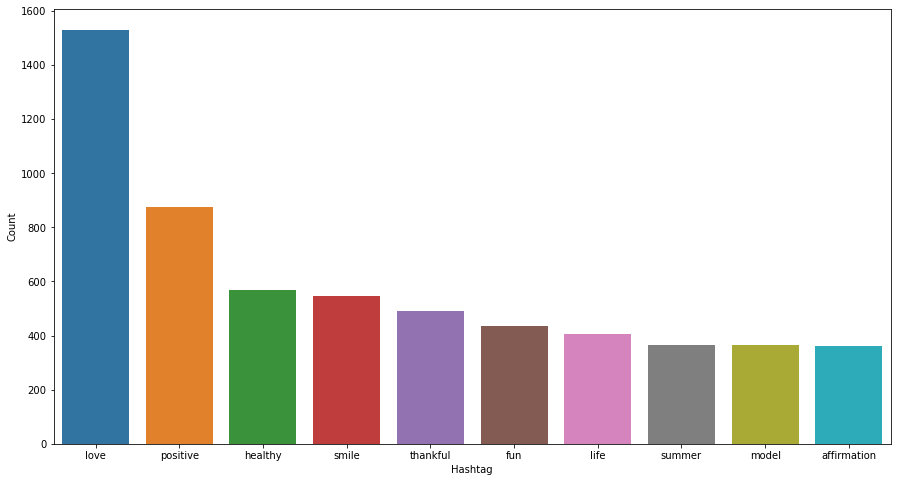

In [22]:
pos = pos.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,8))
sns.barplot(data=pos, x='Hashtag', y='Count')
plt.show()

In [23]:
freq = nltk.FreqDist(hash_neg)
neg = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
neg.head()

Hashtag  Count
0           cnn      9
1      michigan      2
2          tcot     14
3     australia      6
4  opkillingbay      2

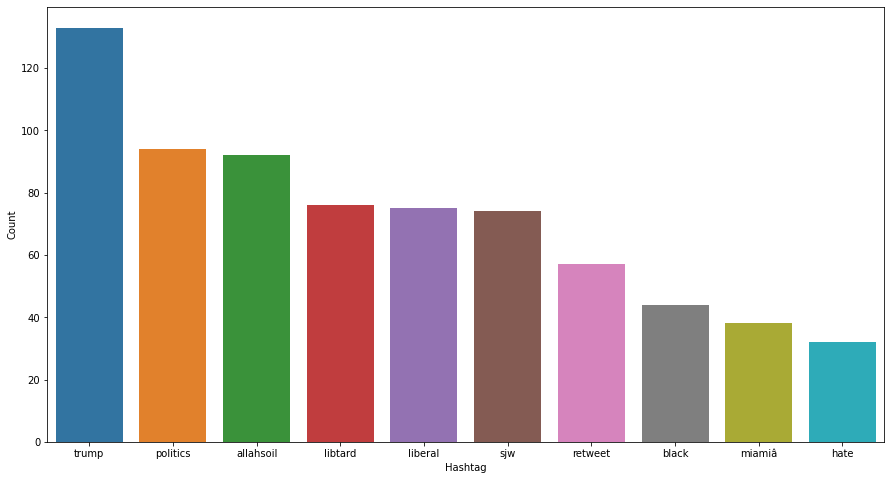

In [24]:
neg = neg.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,8))
sns.barplot(data=neg, x='Hashtag', y='Count')
plt.show()

In [25]:
pip install -U scikit-learn 

Note: you may need to restart the kernel to use updated packages.


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(train['clean_text'])

In [27]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(bow, train['label'], random_state=42, test_size=0.25)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [29]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [30]:
pred = model.predict(xtest)
f1_score(ytest, pred)

0.4835965978128798

In [31]:
accuracy_score(ytest,pred)

0.9468151670629458

In [32]:
pred_prob = model.predict_proba(xtest)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int64)

f1_score(ytest, pred)

0.532520325203252

In [33]:
accuracy_score(ytest,pred)

0.9424352396446002